<h2 style="color: #808080; background-color:#5C4033; text-align:center; border: 3px solid #000000"><span style="color:#FFF; font-weight:800">MACHINE LEARNING FOR EVERYBODY</h2>

In [34]:
import pandas as pandas
import matplotlib.pyplot as plt
import numpy as numpy
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [35]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fm3Long", "fm3Trans", "fAlpha", "fDist", "class"]
dataframe = pandas.read_csv("magic04.data", names=cols)
dataframe.head(5)
print("There are ", len(dataframe.columns), "cols and",  len(dataframe.index) -1, "rows in dataframe.")
print()
dataframe.info()
print()
dataframe.head(3)

There are  11 cols and 19019 rows in dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fm3Long   19020 non-null  float64
 7   fm3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fm3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g


In [36]:
dataframe['class'] = (dataframe['class'] == 'g').astype(int)

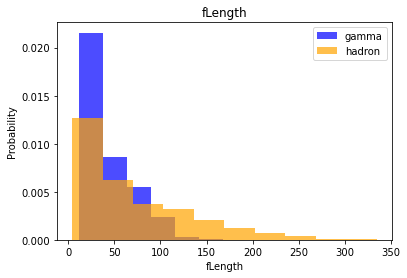

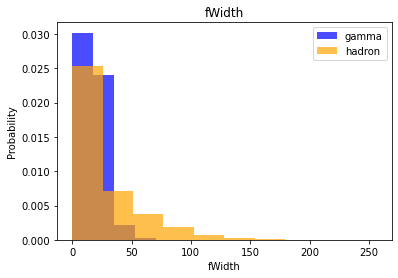

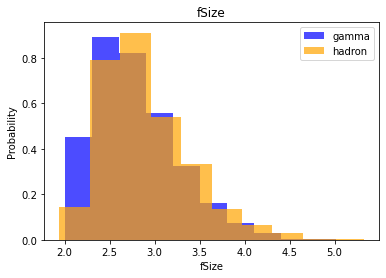

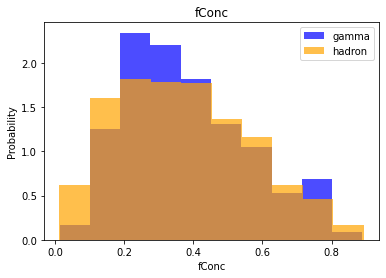

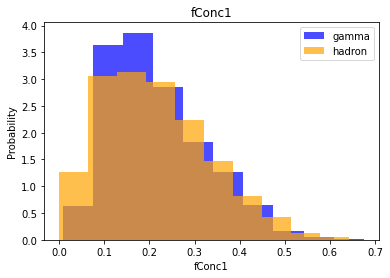

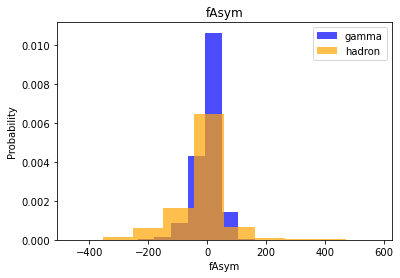

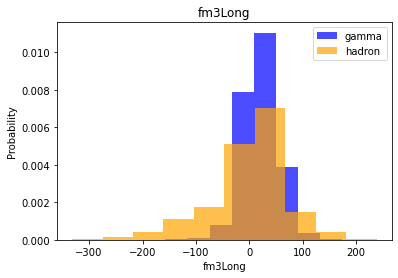

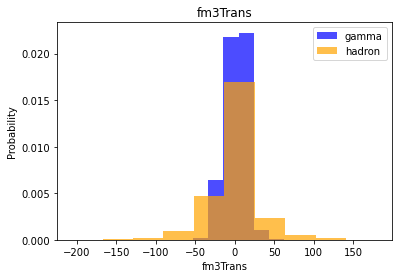

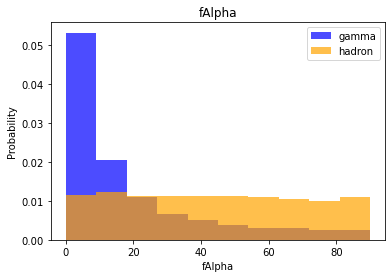

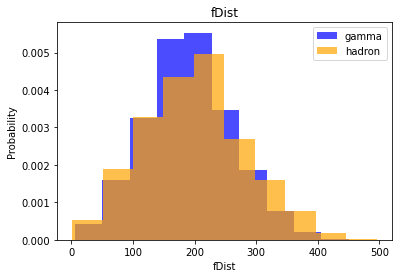

In [37]:
for label in cols[:-1]:
    plt.hist(dataframe[dataframe["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(dataframe[dataframe["class"]==0][label], color='orange', label='hadron', alpha=0.7, density=True)    
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)    
    plt.legend()
    plt.show()

<h2 style="color: #808080; background-color:#5C4033; text-align:center; border: 3px solid #000000"><span style="color:#FFF; font-weight:800">Train Validation Test Datasets</h2>

In [38]:
train, valid, test = numpy.split(dataframe.sample(frac=1), [int(0.6 * len(dataframe)), int(0.8 * len(dataframe))])

In [39]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values  
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    data = numpy.hstack((X, numpy.reshape(y, (-1, 1))))
    return data, X, y

In [40]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

<h2 style="color: #808080; background-color:#5C4033; text-align:center; border: 3px solid #000000"><span style="color:#FFF; font-weight:800">k-Nearest Neighbors</span></h2>

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1351
           1       0.85      0.86      0.85      2453

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

